In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [20]:
umaxap = 1.
udmax = 1.
kglc = 1.
Kilac = 1.
lac = 1.
Yxglc = 1.
Yxmab = 1.
ylp = 1.
Klys = 1.
Cs = 1.

In [27]:
def bior(t, y):
    V,F,u,ud,Qs,Qmab,Qlac, xv, xd, s, mab, lac = y

    T_values = [2.03, 5.02,6.03,7.03,7.88,9.03, 10.02,12.02]
    F_values = [0.2,0.194,0.148,0.156,0.128,0.119,0.232,0.235]
    # Interpolate the flow value at the current time
    Fin = Fout = np.interp(t, T_values, F_values)
    dV = Fin-Fout
    du = umaxap*(s/(kglc+s))*(Kilac/(Kilac+lac))
    dud = udmax*(lac/(Kilac+lac)) #udmax / (1 +((Kilac/lac)**1))
    dQs= (u-ud)/Yxglc
    dQmab=(u-ud)/Yxmab
    dQlac= ylp*Qs
    dxv =(umaxap*(s/(kglc+s))*(Kilac/(Kilac+lac)))*xv-(udmax / (1 +((Kilac/lac)**1)))*xv
    dxd = (udmax / (1 +((Kilac/lac)**1))) * xv - Klys * xd
    ds = -(Qs)*xv+((Fin*Cs)/V)
    dmab = (umaxap*(s/(kglc+s))*(Kilac/(Kilac+lac)))*xv-(udmax / (1 +((Kilac/lac)**1)))/Yxmab* xv
    dlac = ylp*Qs* xv 
    return [dV,F, du, dud, dQs, dQmab, dQlac, dxv, dxd, ds, dmab, dlac]

y0 = [15, 0, 0, 0, 0, 0, 0, 1502000000.00, 19000000.00, 5, 0, 0.000001]
t = (0, 10)

In [28]:
sol = integrate.solve_ivp(bior, t, y0=y0)

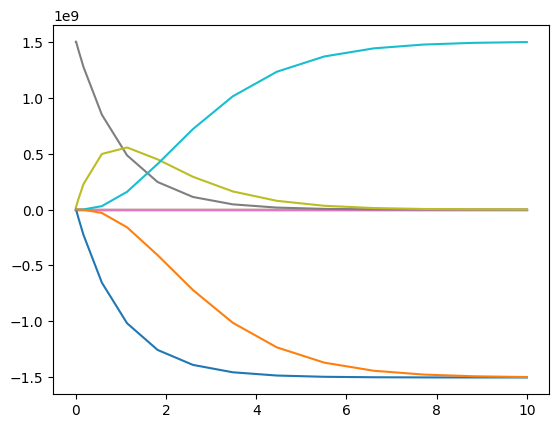

In [29]:
fig, axe = plt.subplots()
axe.plot(sol.t, sol.y.T)